In [1]:
# Import Library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# 1. Load dataset Breast Cancer dari scikit-learn
cancer = datasets.load_breast_cancer()
X = cancer.data    # inputan untuk machine learning
y = cancer.target  # output yang dinginkan dari machine learning 

# Mengubah dataset menjadi DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Simpan dataset ke dalam file CSV
df.to_csv("breast_cancer_dataset.csv", index=False)
print("Dataset telah disimpan sebagai 'breast_cancer_dataset.csv'")

# Tampilkan 5 baris teratas
df.head(5)

Dataset telah disimpan sebagai 'breast_cancer_dataset.csv'


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Menampilkan kumpulan data
df.info()

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['target'])
y = df['target']
# Hitung label target
y.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

target
1    357
0    212
Name: count, dtype: int64

In [4]:
# 2. Preprocessing Data
# Pengecekan missing value
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Pengecekan duplikat
duplicates = df.duplicated().sum()
print("Jumlah duplikat:", duplicates)

# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Normalisasi fitur untuk meningkatkan performa KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Jumlah duplikat: 0


In [5]:
# 3. Membagi dataset menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y) 

C:\Users\Nisrina\AppData\Local\Temp\ipykernel_12392\2373298261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='husl')


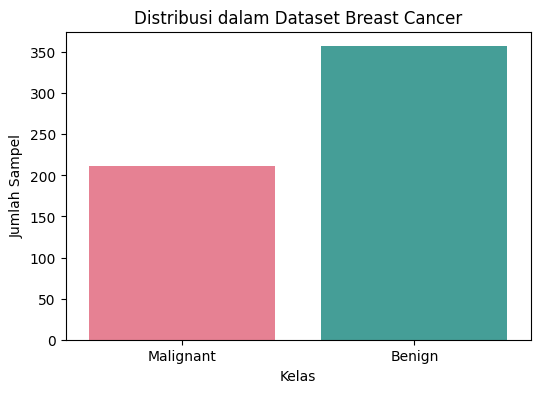

In [6]:
# 4. Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='husl')
plt.title('Distribusi dalam Dataset Breast Cancer')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

In [7]:
# 5. Processing Data - Hyperparameter Tuning
param_grid_knn = {'n_neighbors': range(1, 20)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'n_neighbors': 7}


In [8]:
# 6. Training model dengan KNN
knn_model = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [9]:
# Prediksi pada data uji 
y_pred_knn = knn_model.predict(X_test) 

In [10]:
# 7. Hasil evaluasi model KNN 
# Menampilkan laporan klasifikasi
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Malignant', 'Benign']))

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Akurasi Model KNN: {accuracy:.2f}')

Classification Report (KNN):
              precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        42
      Benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Akurasi Model KNN: 0.96


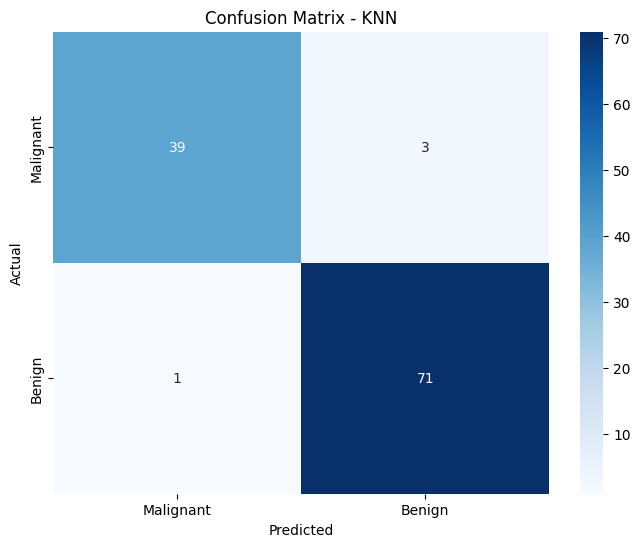

In [11]:
# 8.Visualisasi Confusion Matrix untuk KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [12]:
# Analisis hasil
print("\nAnalisis Hasil:")
print("1. Dataset Breast Cancer memiliki dua kelas: malignant (ganas) dan benign (jinak).")
print("2. Normalisasi fitur membantu meningkatkan akurasi dengan menghindari dominasi fitur dengan skala besar.")
print("4. Nilai k optimal untuk dataset ini adalah k=7")
print("3. Model KNN dengan k=7 memberikan akurasi yang cukup tinggi, menunjukkan bahwa KNN cocok untuk dataset ini.")



Analisis Hasil:
1. Dataset Breast Cancer memiliki dua kelas: malignant (ganas) dan benign (jinak).
2. Normalisasi fitur membantu meningkatkan akurasi dengan menghindari dominasi fitur dengan skala besar.
4. Nilai k optimal untuk dataset ini adalah k=7
3. Model KNN dengan k=7 memberikan akurasi yang cukup tinggi, menunjukkan bahwa KNN cocok untuk dataset ini.


In [13]:
# Penjelasan hasil visualisasi
print("\nPenjelasan Visualisasi:")
print("1. Confusion Matrix menunjukkan jumlah prediksi yang benar dan salah. Mayoritas prediksi benar, menunjukkan model yang cukup akurat.")
print("2. Distribusi kelas menunjukkan bahwa jumlah sampel benign lebih banyak daripada malignant, yang dapat mempengaruhi keseimbangan model.")



Penjelasan Visualisasi:
1. Confusion Matrix menunjukkan jumlah prediksi yang benar dan salah. Mayoritas prediksi benar, menunjukkan model yang cukup akurat.
2. Distribusi kelas menunjukkan bahwa jumlah sampel benign lebih banyak daripada malignant, yang dapat mempengaruhi keseimbangan model.
